In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


import pandas as pd
import os

import sys

import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
import sys
sys.path.insert(1, '/projects/reba1583/Research3/AntarcticAR_ML/')
from functions import get_variable_shap, get_variable_names, get_variable_shap_spatial
from define_variables import get_variables,get_variable_names,get_variable_lats

In [3]:
region = 9
results_folder = '/rc_scratch/reba1583/XGB_test4_region'+str(region)+'/'

results = pd.read_csv(results_folder+'results.csv')
# shap_xr = xr.open_mfdataset(results_folder+'shap.nc')
shap_xr = pd.read_csv(results_folder+'shap.nc', index_col=0)


m = XGBClassifier()
m.load_model(results_folder+'model.json')

In [4]:
m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [5]:
m.best_iteration

499

In [6]:
tp = np.where((results.Y_Val==1) & (results.Y_pred==1),1,0).sum()
fp = np.where((results.Y_Val==0) & (results.Y_pred==1),1,0).sum()
tn = np.where((results.Y_Val==0) & (results.Y_pred==0),1,0).sum()
fn = np.where((results.Y_Val==1) & (results.Y_pred==0),1,0).sum()

print('true pos: '+str(np.round(tp/len(results.Y_pred)*100,0))+'%')
print('false pos: '+str(np.round(fp/len(results.Y_pred)*100,0))+'%')
print('true neg: '+str(np.round(tn/len(results.Y_pred)*100,0))+'%')
print('false neg: '+str(np.round(fn/len(results.Y_pred)*100,0))+'%')

print('Accuracy: '+str(np.round(np.where((results.Y_Val== results.Y_pred),1,0).sum()/len(results.Y_pred)*100,0))+'%')

true pos: 9.0%
false pos: 9.0%
true neg: 80.0%
false neg: 3.0%
Accuracy: 89.0%


In [10]:
tp = np.where((results.Y_Val==1) & (results.Y_pred==1),1,0).sum()
fp = np.where((results.Y_Val==0) & (results.Y_pred==1),1,0).sum()
tn = np.where((results.Y_Val==0) & (results.Y_pred==0),1,0).sum()
fn = np.where((results.Y_Val==1) & (results.Y_pred==0),1,0).sum()

print('true pos: '+str(np.round(tp/len(results.Y_Val)*100,0))+'%')
print('false pos: '+str(np.round(fp/len(results.Y_Val)*100,0))+'%')
print('true neg: '+str(np.round(tn/len(results.Y_Val)*100,0))+'%')
print('false neg: '+str(np.round(fn/len(results.Y_Val)*100,0))+'%')
print('Accuracy: '+str(np.round(np.where((results.Y_Val== results.Y_pred),1,0).sum()/len(results.Y_Val)*100,0))+'%')

true pos: 9.0%
false pos: 9.0%
true neg: 80.0%
false neg: 3.0%
Accuracy: 89.0%


In [14]:
tn

1742

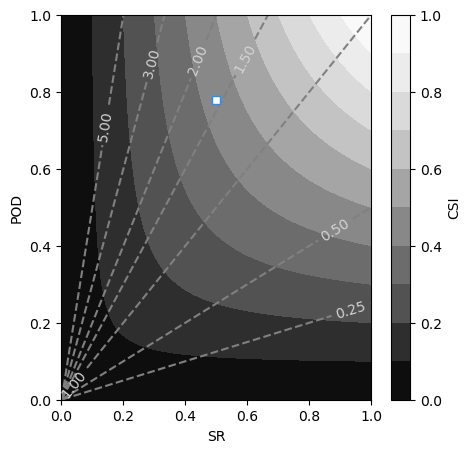

In [117]:
#import some helper functions for our other directory.
import sys
sys.path.insert(1, '/projects/reba1583/Research3/WAF_ML_Tutorial_Part2/scripts/')
#load contingency_table func
from gewitter_functions import get_contingency_table,make_performance_diagram_axis,get_acc,get_pod,get_sr,csi_from_sr_and_pod

#calc x,y of performance diagram 
pod= tp/(tp + fn)
sr = tp/(tp + fp)
csi = tp/(tp + fn + fp)

fig,ax = plt.subplots(1,1,figsize=(5,5))

#plot it up  
make_performance_diagram_axis(ax)
ax.plot(sr,pod,'-s',color='dodgerblue',markerfacecolor='w')

index_ar = shap_xr.iloc[results[results.Y_pred ==1].index]
shap_list_ar = np.array(get_variable_shap(np.array(index_ar))) # needs to be shape (categories, time)
shap.summary_plot(shap_list_ar, feature_names = get_variable_names()) ## shap summary plots

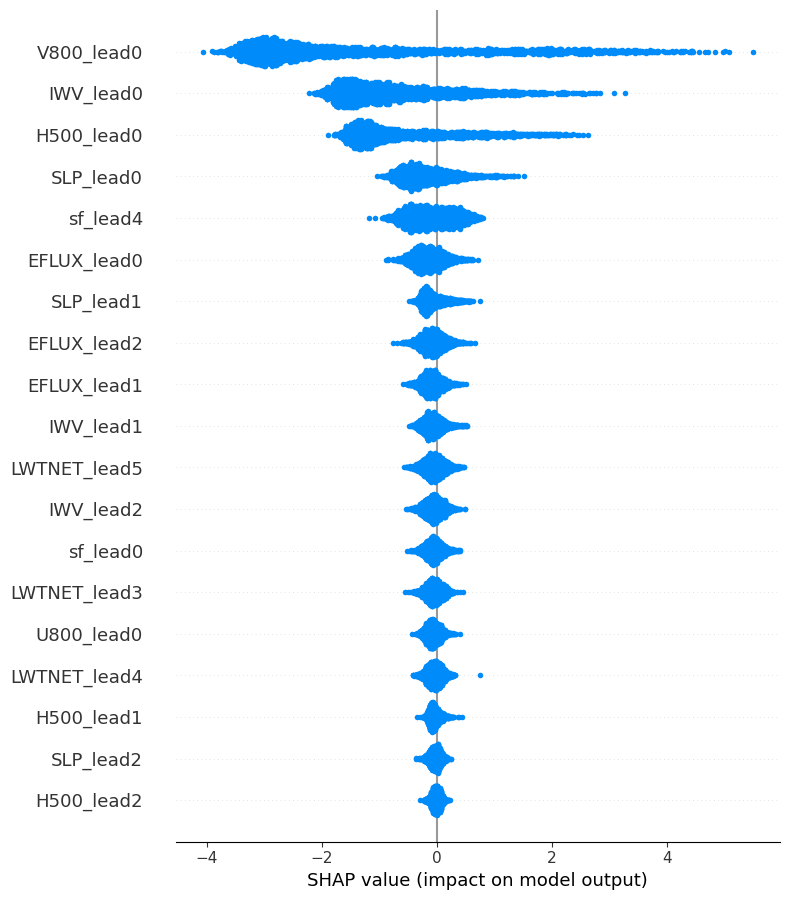

In [120]:
# group shap by variable, sum along lon/lat
shap_list = np.array(get_variable_shap(np.array(shap_xr))) # needs to be shape (categories, time)

shap.summary_plot(shap_list, feature_names = get_variable_names()) 


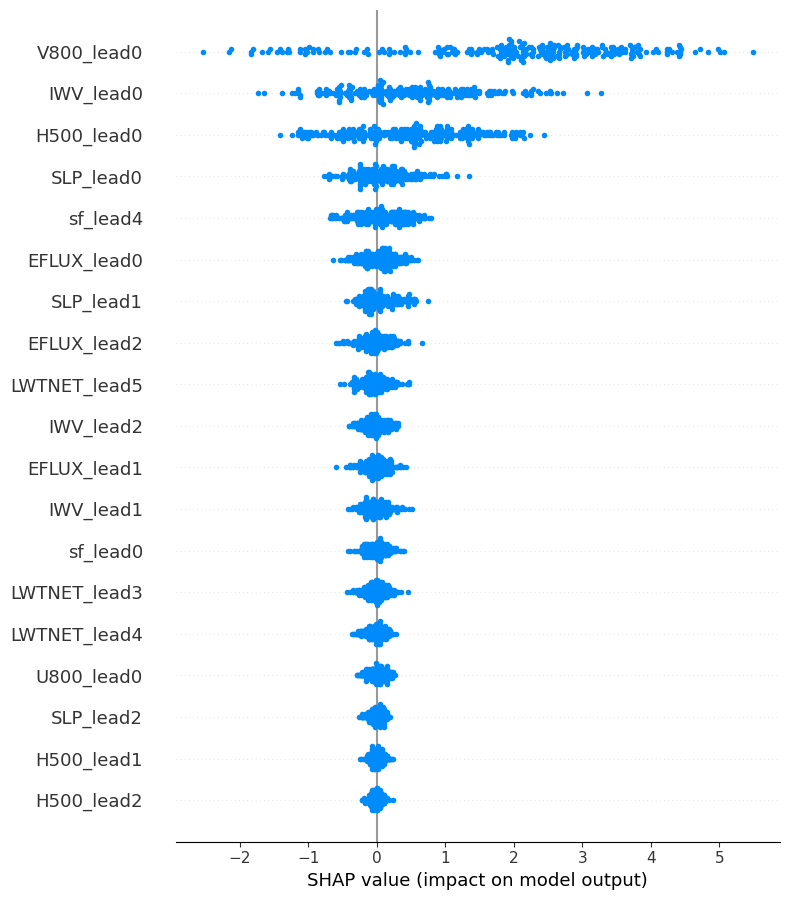

In [140]:
index_ar = shap_xr.iloc[results[results.Y_Val ==1].index]
shap_list_ar = np.array(get_variable_shap(np.array(index_ar))) # needs to be shape (categories, time)
shap.summary_plot(shap_list_ar, feature_names = get_variable_names()) 


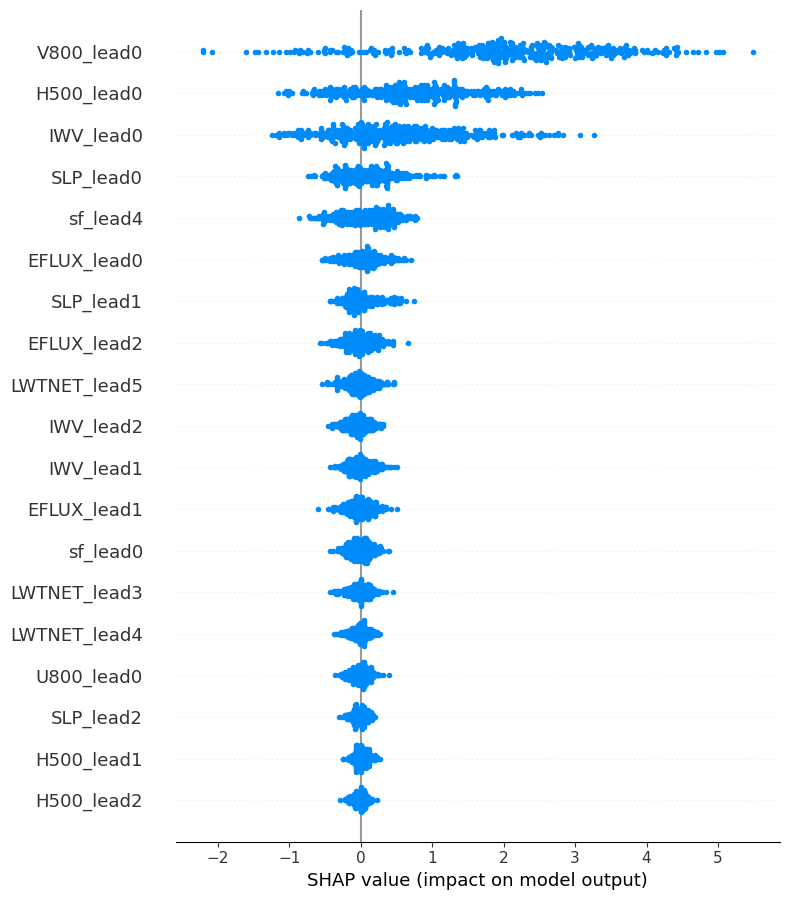

In [141]:
index_ar = shap_xr.iloc[results[results.Y_pred ==1].index]
shap_list_ar = np.array(get_variable_shap(np.array(index_ar))) # needs to be shape (categories, time)
shap.summary_plot(shap_list_ar, feature_names = get_variable_names()) 


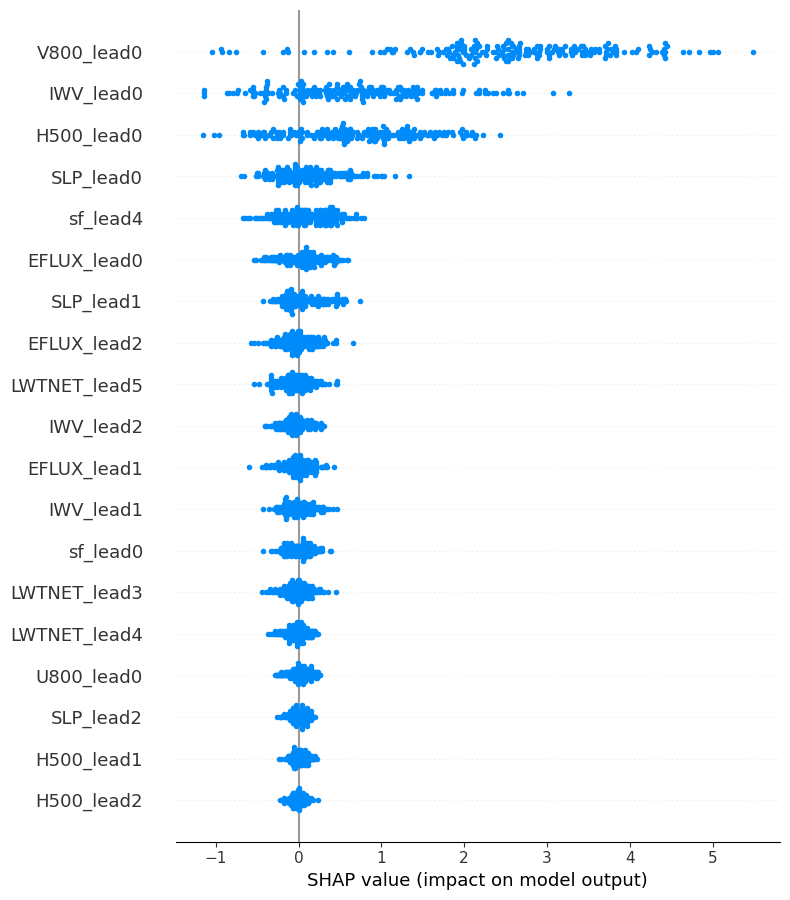

In [145]:
index_ar = shap_xr.iloc[results[(results.Y_pred ==1) & (results.Y_Val ==1)].index]
shap_list_ar = np.array(get_variable_shap(np.array(index_ar))) # needs to be shape (categories, time)
shap.summary_plot(shap_list_ar, feature_names = get_variable_names()) 

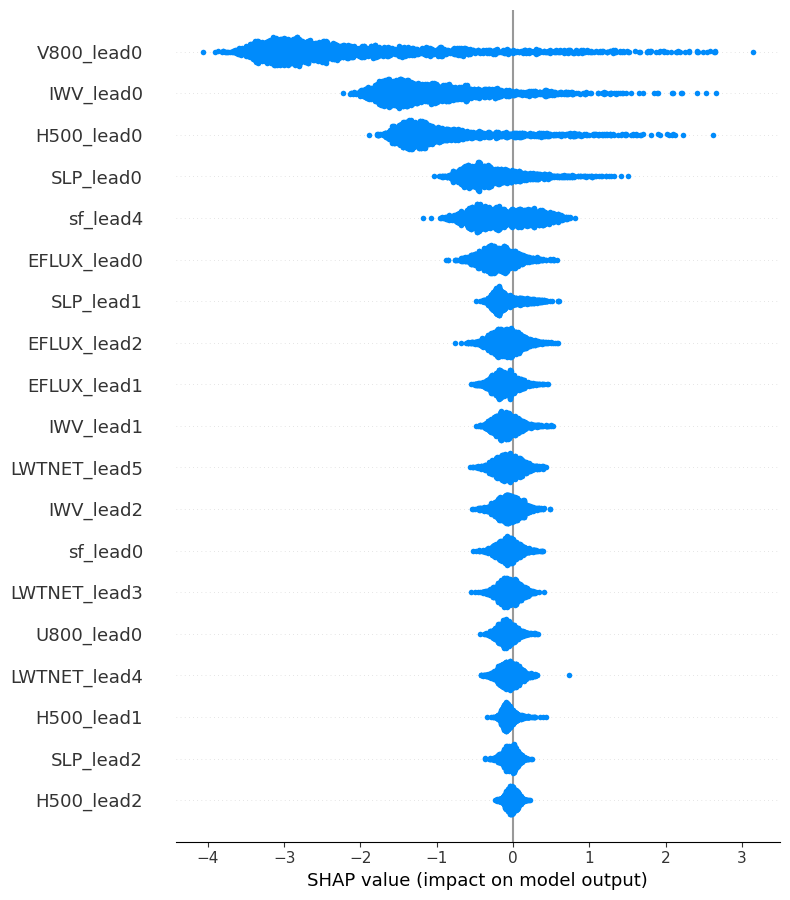

In [146]:
index_ar = shap_xr.iloc[results[(results.Y_pred ==0) & (results.Y_Val ==0)].index]
shap_list_ar = np.array(get_variable_shap(np.array(index_ar))) # needs to be shape (categories, time)
shap.summary_plot(shap_list_ar, feature_names = get_variable_names()) 

In [297]:
variable = 'sf_lead0'
one_variable_shap = shap_xr.sel(n_channel = variable).stack(data=['time','lon', 'lat']).shap_values.values
X_ds = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Daily_Data_CNN/validate_full.nc').load()
one_variable_X = X_ds.sel(n_channel = variable).features.stack(data=['time','lon', 'lat']).values
one_variable_X = np.reshape(one_variable_X, (len(one_variable_X),1))
one_variable_shap = np.reshape(one_variable_shap, (len(one_variable_shap),1))


In [294]:
variable

'IWV_lead2'

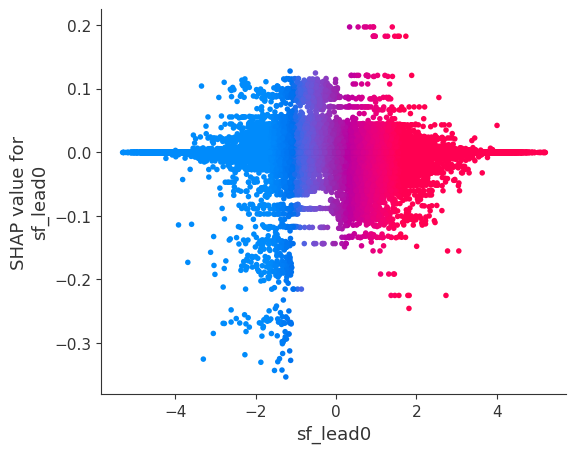

In [300]:




shap.dependence_plot(ind = variable, feature_names = variable, shap_values = one_variable_shap, features = one_variable_X)


## spatial plots

In [121]:
spatial_shap = get_variable_shap_spatial(np.array(shap_xr))

In [122]:
# regional mask
slice_start = np.array([0, 36, 72, 108, 144, -180 ,-144, -108, -72,-36])
slice_end = slice_start + 36

s_start = slice_start[region-1]
s_end = slice_end[region-1]



focus_region=xr.open_dataset('/projects/reba1583/Research/Data/AIS_Full_basins_Zwally_MERRA2grid.nc')
focus_region_lat = focus_region.sel(lat = slice(-90,-60),lon = slice(s_start,s_end)).lat
focus_region_lon = focus_region.sel(lat = slice(-90,-60),lon = slice(s_start,s_end)).lon
focus_region_mask = np.ones((len(focus_region_lat),len(focus_region_lon)))


In [123]:
#load maps
ice_shelf_line = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m',edgecolor='black',facecolor='none') # 10m, 50m, 110m

variable_lats = [
    [-75,-40], [-75,-40], [-75,-40],    
    [-75,-40],    
    [-75,-40],    
    [-75,-40], [-75,-40],[-75,-40],    
    [-75,-20], [-75,-20], [-75,-20],    
    [-20,0], [-20,0], [-20,0],     
    [-90,0], [-90,0],    
    [-75,-40], [-75,-40], [-75,-40],
]

## colors
lightgreen = '#51B3B3'
darkgreen = "#1E4C4C"

lightpink = '#E93788'
darkpink = '#982E59'

lightpurple = '#AB6FF7'
darkpurple = '#520BAF'

lightblue = '#75FBFD'
yellow = '#FADF68'

background = '#F5F3F8'
# create Green
N = 256
green = np.ones((N, 4))
green[:, 0] = np.linspace(30/256, 1, N) # R = 
green[:, 1] = np.linspace(76/256, 1, N) # G =
green[:, 2] = np.linspace(76/256, 1, N)  # B = 
green_cmap = ListedColormap(green).reversed()
green_gradient = np.vstack((np.ones((10,4)), green_cmap(np.linspace(0, 1, 90))))
green_cmap = ListedColormap(green_gradient, name = 'green_cmap')

# create purple
N = 256
purple = np.ones((N, 4))
purple[:, 0] = np.linspace(54/256, 1, N) # R = 
purple[:, 1] = np.linspace(0/256, 1, N) # G =
purple[:, 2] = np.linspace(109/256, 1, N)  # B = 
purple_cmap = ListedColormap(purple).reversed()
purple_gradient = np.vstack((np.ones((10,4)), purple_cmap(np.linspace(0, 1, 90))))
purple_cmap = ListedColormap(purple_gradient, name = 'purple_cmap')


newcolors = np.vstack((green_cmap.reversed()(np.linspace(0, 1, 128)), #(211/256,211/256,211/256,1),
                       purple_cmap.reversed()(np.linspace(1, 0, 128))))
double = ListedColormap(newcolors, name='double')


In [134]:
def plot_spatial_shap(data):
    fig = plt.figure(figsize=(21,15), constrained_layout=False)
    gs = fig.add_gridspec(3, 7)
    ax1 = fig.add_subplot(gs[0, 0], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax2 = fig.add_subplot(gs[1,0], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax3 = fig.add_subplot(gs[2,0], projection =ccrs.SouthPolarStereo(central_longitude=0))

    ax4 = fig.add_subplot(gs[0,1 ], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax5 = fig.add_subplot(gs[1,1], projection =ccrs.SouthPolarStereo(central_longitude=0))

    ax6 = fig.add_subplot(gs[0, 2], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax7 = fig.add_subplot(gs[1,2], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax8 = fig.add_subplot(gs[2,2], projection =ccrs.SouthPolarStereo(central_longitude=0))

    ax9 = fig.add_subplot(gs[0, 3], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax10 = fig.add_subplot(gs[1,3], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax11 = fig.add_subplot(gs[2, 3], projection =ccrs.SouthPolarStereo(central_longitude=0))

    ax12 = fig.add_subplot(gs[0,4], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax13 = fig.add_subplot(gs[1,4], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax14 = fig.add_subplot(gs[2,4], projection =ccrs.SouthPolarStereo(central_longitude=0))

    ax15 = fig.add_subplot(gs[0, 5], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax16 = fig.add_subplot(gs[1,5], projection =ccrs.SouthPolarStereo(central_longitude=0))

    ax17 = fig.add_subplot(gs[0, 6], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax18 = fig.add_subplot(gs[1,6], projection =ccrs.SouthPolarStereo(central_longitude=0))
    ax19 = fig.add_subplot(gs[2,6], projection =ccrs.SouthPolarStereo(central_longitude=0))


    axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19]
    for a in axes:
        a.set_extent([-180, 180, -90, 0], ccrs.PlateCarree())
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        a.set_boundary(circle, transform=a.transAxes)
        grid=a.gridlines(zorder = 20)
        grid.n_steps=30
        a.coastlines(resolution='50m', color = 'black',linewidth = .5)
        a.add_feature(ice_shelf_line, color = 'black', linewidth = .5)

        a.contourf(focus_region_lon, focus_region_lat, focus_region_mask,cmap = ListedColormap(['yellow', 'yellow']), transform=ccrs.PlateCarree())

    for a in range(len(axes)):
    #     cf=axes[a].contourf(np.linspace(-180,180,144), get_variable_lats()[a],  spatial_shap[a].T, levels = np.arange(-4,5,1)
    #             ,cmap = double,transform=ccrs.PlateCarree())
        cf = axes[a].pcolormesh(np.linspace(-180,180,144), get_variable_lats()[a],data[a].T,  transform=ccrs.PlateCarree()
                               , cmap = double, vmin = -3, vmax = 3)

        axes[a].set_title(get_variable_names()[a])
    cb = plt.colorbar(cf, ax =axes,orientation='horizontal', pad=0.03, extendrect=True, aspect=25, shrink=0.9)



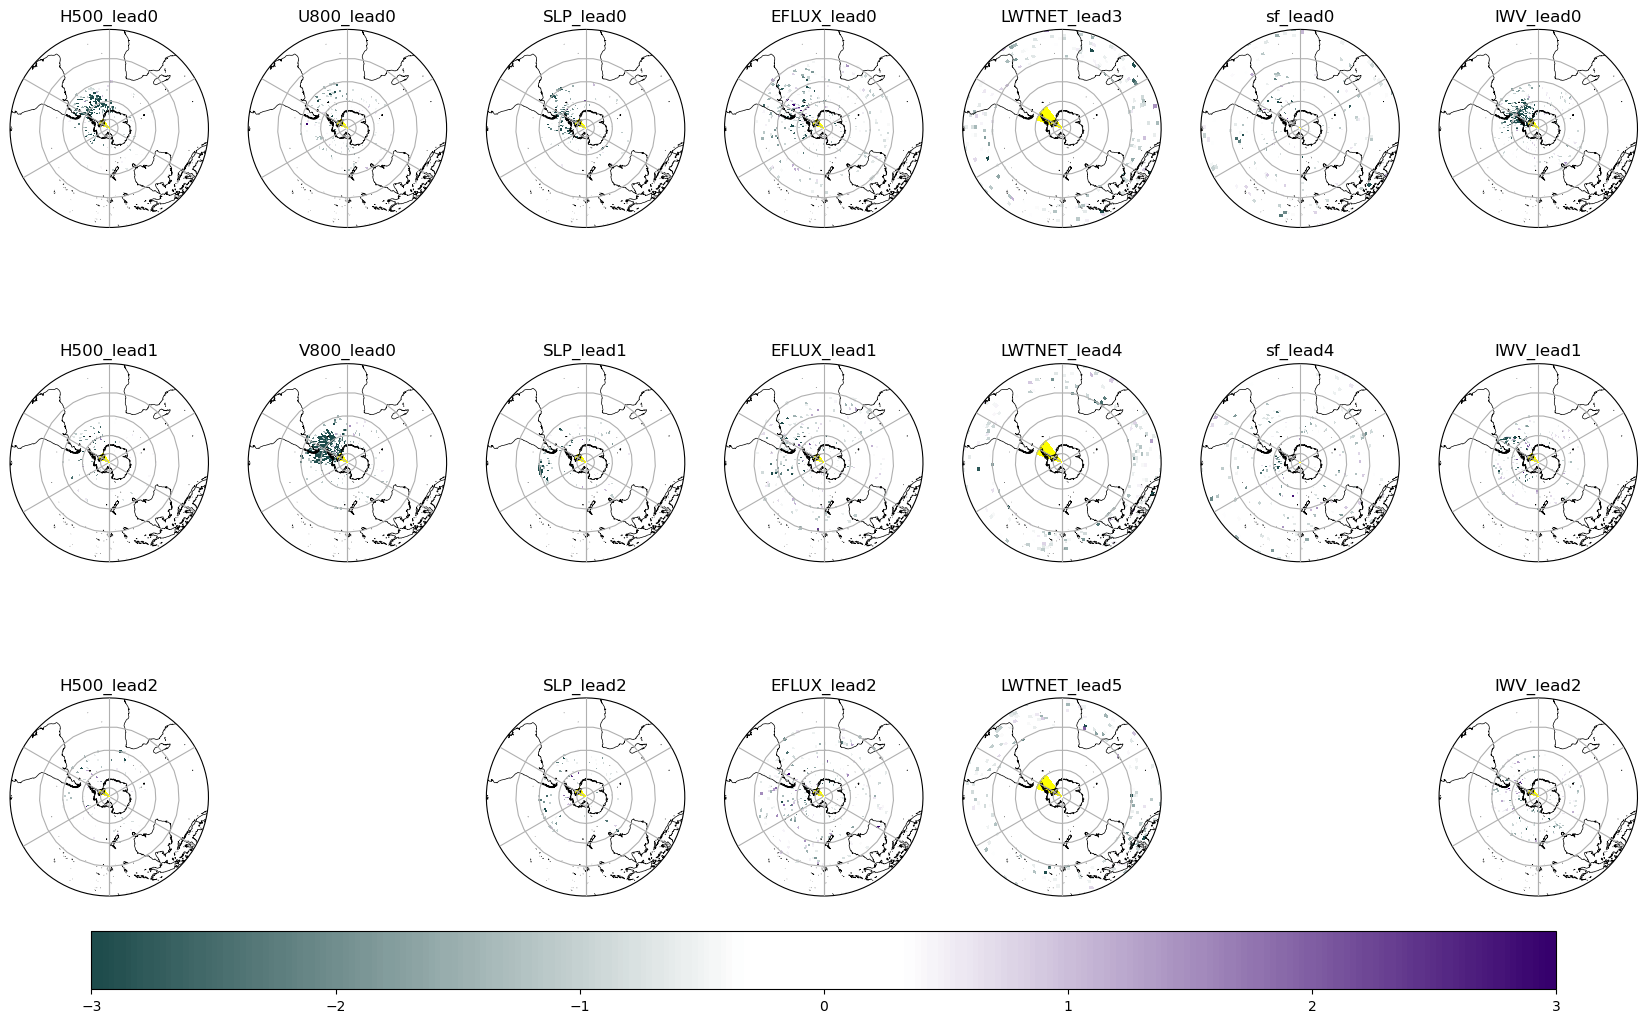

In [135]:
plot_spatial_shap(spatial_shap)

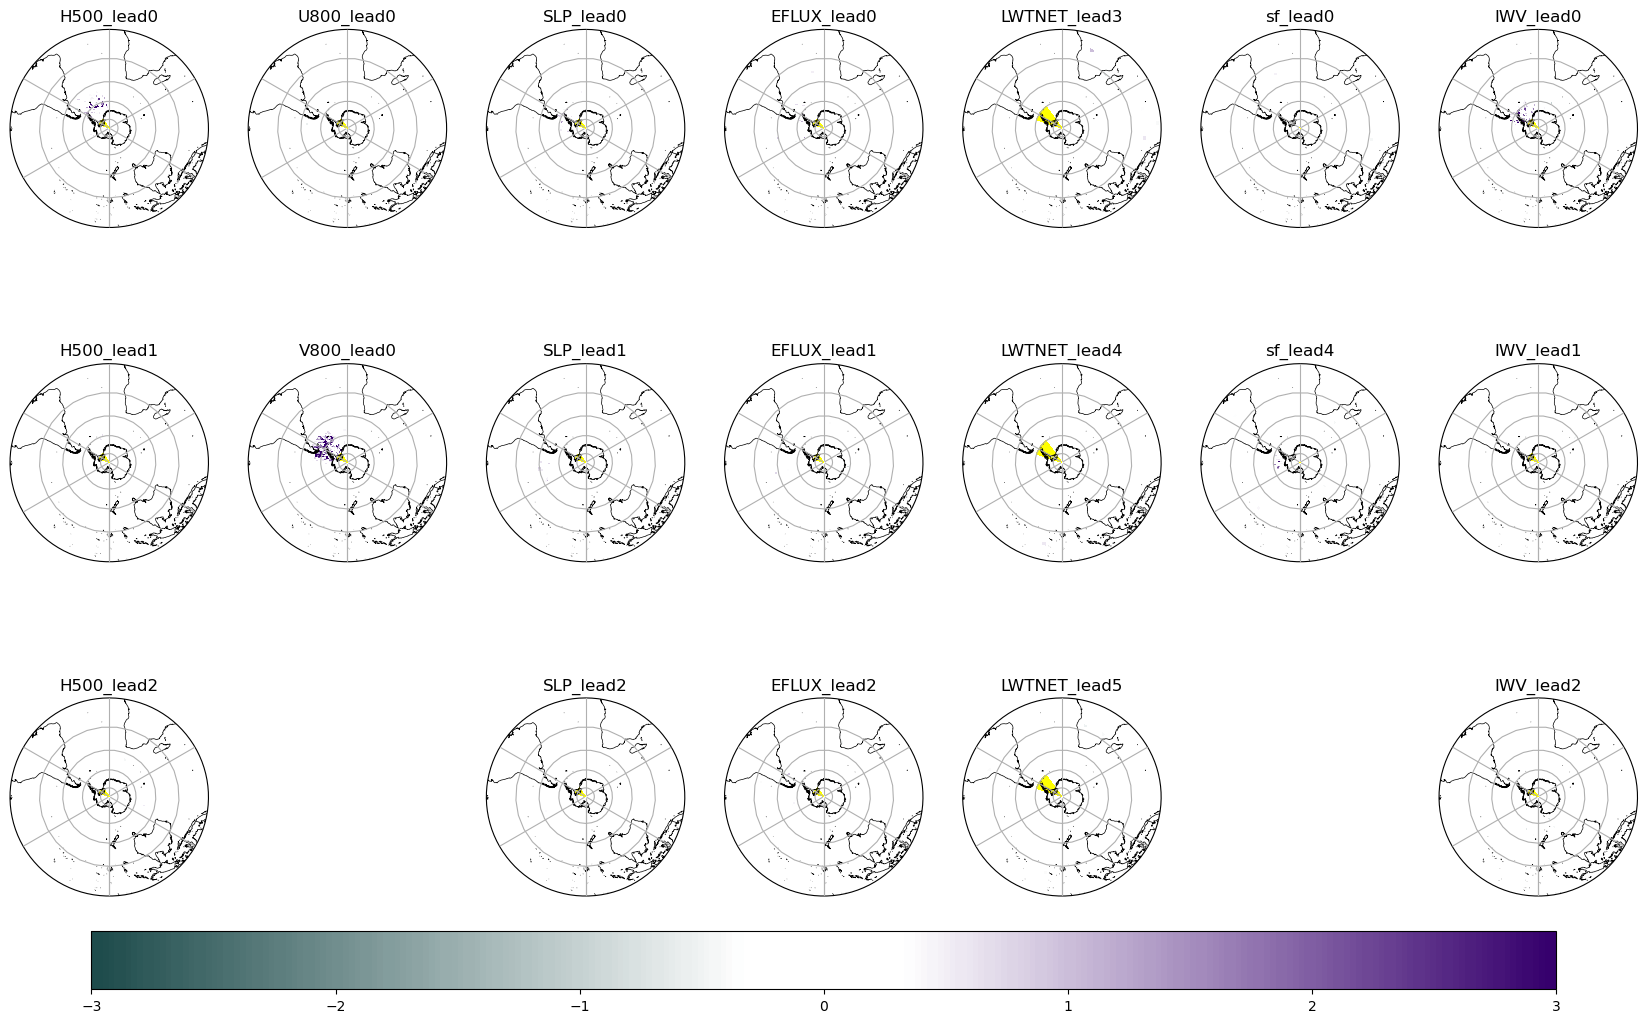

In [137]:
index_ar = shap_xr.iloc[results[results.Y_Val ==1].index]
spatial_shap_ar = get_variable_shap_spatial(np.array(index_ar))
plot_spatial_shap(spatial_shap_ar)

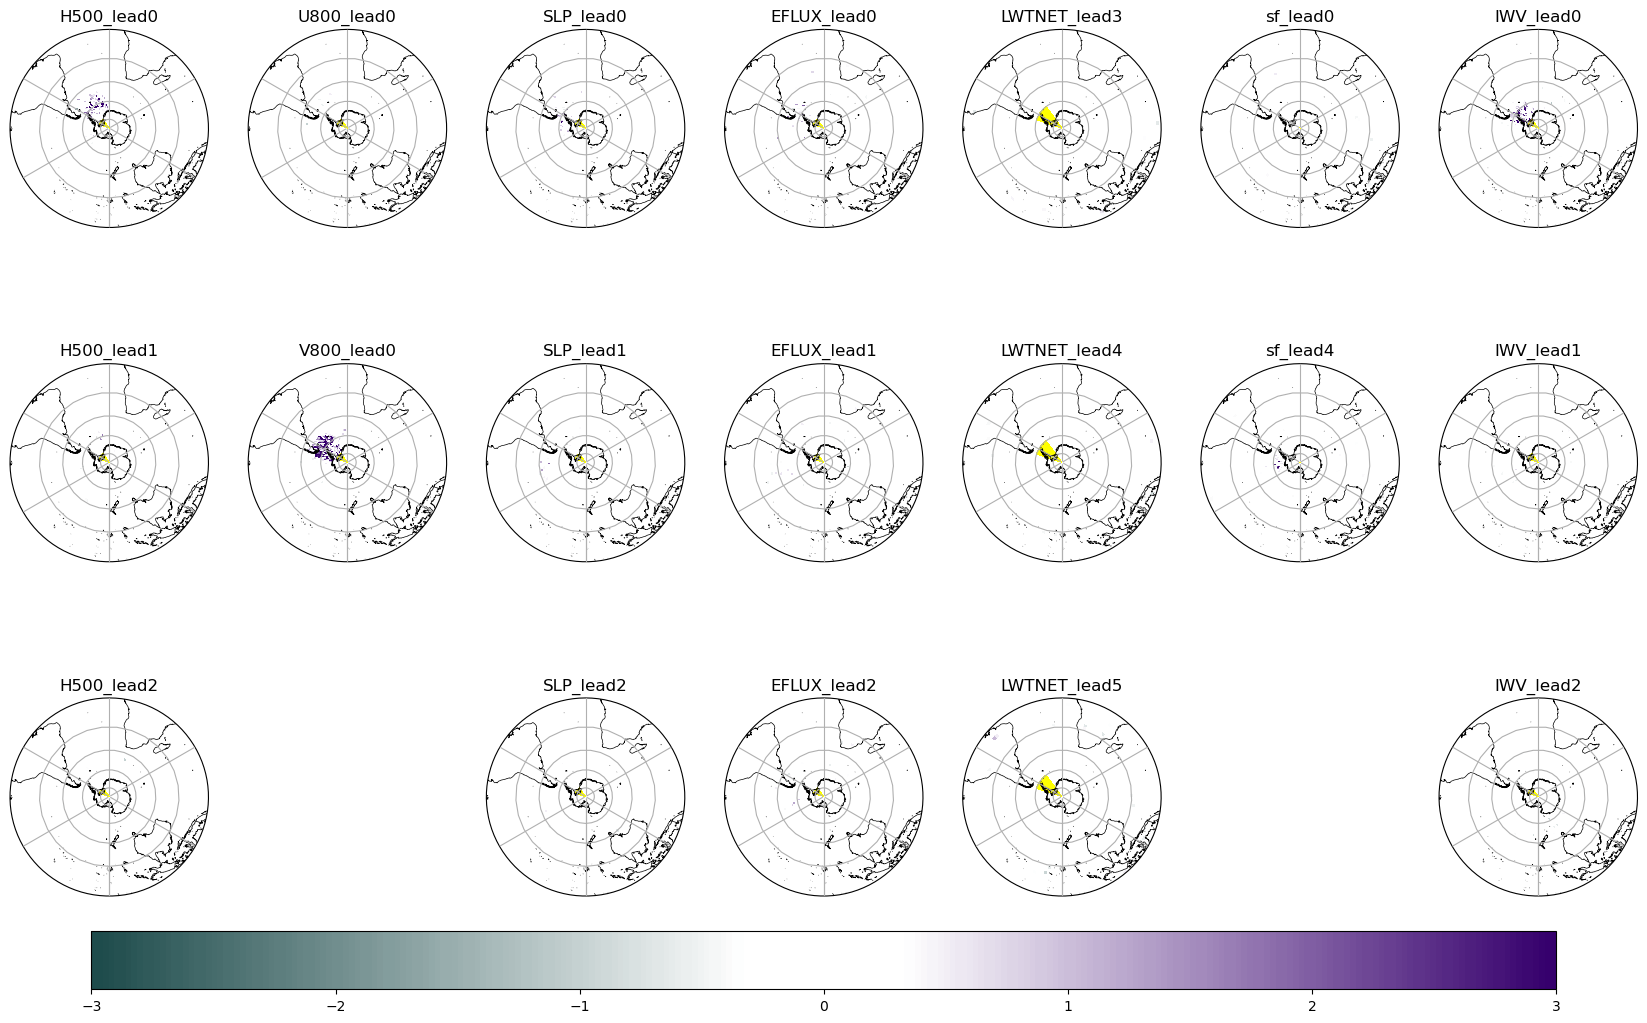

In [139]:
index_ar = shap_xr.iloc[results[results.Y_pred ==1].index]
spatial_shap_ar = get_variable_shap_spatial(np.array(index_ar))
plot_spatial_shap(spatial_shap_ar)

In [ ]:
# fig, ax=plt.subplots(ncols=5,nrows=4,figsize=(20,15),subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})
fig = plt.figure(figsize=(21,15), constrained_layout=False)
gs = fig.add_gridspec(3, 7)
ax1 = fig.add_subplot(gs[0, 0], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax2 = fig.add_subplot(gs[1,0], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax3 = fig.add_subplot(gs[2,0], projection =ccrs.SouthPolarStereo(central_longitude=0))

ax4 = fig.add_subplot(gs[0,1 ], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax5 = fig.add_subplot(gs[1,1], projection =ccrs.SouthPolarStereo(central_longitude=0))

ax6 = fig.add_subplot(gs[0, 2], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax7 = fig.add_subplot(gs[1,2], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax8 = fig.add_subplot(gs[2,2], projection =ccrs.SouthPolarStereo(central_longitude=0))

ax9 = fig.add_subplot(gs[0, 3], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax10 = fig.add_subplot(gs[1,3], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax11 = fig.add_subplot(gs[2, 3], projection =ccrs.SouthPolarStereo(central_longitude=0))

ax12 = fig.add_subplot(gs[0,4], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax13 = fig.add_subplot(gs[1,4], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax14 = fig.add_subplot(gs[2,4], projection =ccrs.SouthPolarStereo(central_longitude=0))

ax15 = fig.add_subplot(gs[0, 5], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax16 = fig.add_subplot(gs[1,5], projection =ccrs.SouthPolarStereo(central_longitude=0))

ax17 = fig.add_subplot(gs[0, 6], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax18 = fig.add_subplot(gs[1,6], projection =ccrs.SouthPolarStereo(central_longitude=0))
ax19 = fig.add_subplot(gs[2,6], projection =ccrs.SouthPolarStereo(central_longitude=0))


axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19]
for a in axes:
    a.set_extent([-180, 180, -90, 0], ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    a.set_boundary(circle, transform=a.transAxes)
    grid=a.gridlines(zorder = 20)
    grid.n_steps=30
    a.coastlines(resolution='50m', color = 'black',linewidth = .5)
    a.add_feature(ice_shelf_line, color = 'black', linewidth = .5)

    a.contourf(focus_region_lon, focus_region_lat, focus_region_mask,cmap = ListedColormap(['yellow', 'yellow']), transform=ccrs.PlateCarree())
    
for a in range(len(axes)):
#     cf=axes[a].contourf(np.linspace(-180,180,144), get_variable_lats()[a],  spatial_shap[a].T, levels = np.arange(-4,5,1)
#             ,cmap = double,transform=ccrs.PlateCarree())
    cf = axes[a].pcolormesh(np.linspace(-180,180,144), get_variable_lats()[a],spatial_shap[a].T,  transform=ccrs.PlateCarree()
                           , cmap = double, vmin = -3, vmax = 3)

    axes[a].set_title(get_variable_names()[a])
cb = plt.colorbar(cf, ax =axes,orientation='horizontal', pad=0.03, extendrect=True, aspect=25, shrink=0.9)
